In [362]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-classification-mri'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [363]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [364]:
import ipywidgets as widgets 
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Folder - Paths

In [365]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

        
for i in labels :
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [366]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
X_train.shape

(3264, 150, 150, 3)

Train - Test - Split

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 101)

In [368]:
y_train_new = []
for i in y_train :
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test :
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [369]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

model = Sequential()

model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.475))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.475))
model.add(Dense(4, activation='softmax'))




In [370]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 batch_normalization_13 (Bat  (None, 4, 4, 512)        2048      
 chNormalization)                                                
                                                                 
 flatten_17 (Flatten)        (None, 8192)              0         
                                                                 
 dense_56 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 256)               65792     
                                                     

In [371]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [372]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
66/66 [==============================] - 7s 57ms/step - loss: 1.2873 - accuracy: 0.5613 - val_loss: 0.7045 - val_accuracy: 0.7591
Epoch 2/20
66/66 [==============================] - 4s 61ms/step - loss: 0.7128 - accuracy: 0.7462 - val_loss: 0.4735 - val_accuracy: 0.8604
Epoch 3/20
66/66 [==============================] - 3s 53ms/step - loss: 0.5544 - accuracy: 0.8036 - val_loss: 0.3895 - val_accuracy: 0.8815
Epoch 4/20
66/66 [==============================] - 3s 52ms/step - loss: 0.3816 - accuracy: 0.8606 - val_loss: 0.3938 - val_accuracy: 0.8834
Epoch 5/20
66/66 [==============================] - 3s 52ms/step - loss: 0.2883 - accuracy: 0.8942 - val_loss: 0.3709 - val_accuracy: 0.8929
Epoch 6/20
66/66 [==============================] - 3s 52ms/step - loss: 0.2770 - accuracy: 0.9042 - val_loss: 0.3306 - val_accuracy: 0.9159
Epoch 7/20
66/66 [==============================] - 4s 61ms/step - loss: 0.2180 - accuracy: 0.9243 - val_loss: 0.3540 - val_accuracy: 0.9159
Epoch 8/20
66

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_28/2860275626.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


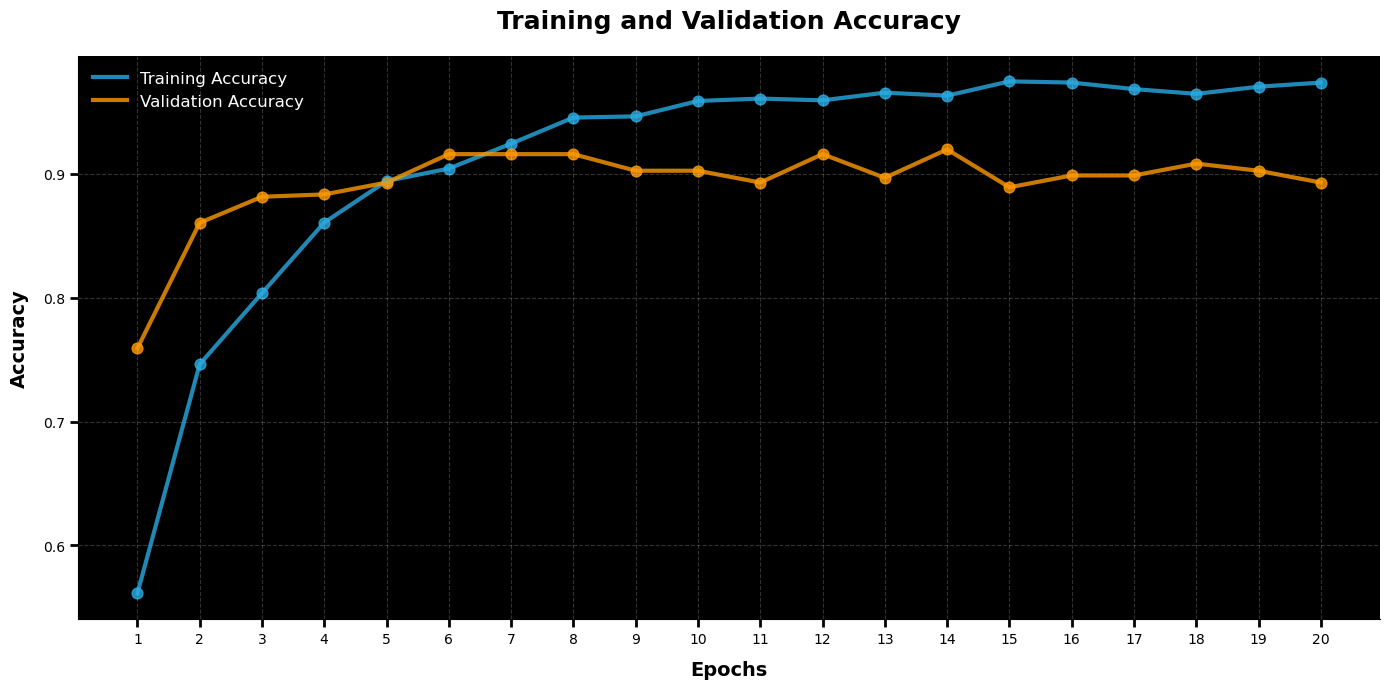

In [374]:
model.save('braintumor.h5')

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='both', length=6, width=2)
ax.set_facecolor('#000000') 

ax.plot(epochs, acc, linewidth=3, label="Training Accuracy", color='#29abe2', alpha=0.8)
ax.scatter(epochs, acc, s=60, color='#29abe2', alpha=0.8)

ax.plot(epochs, val_acc, linewidth=3, label="Validation Accuracy", color='#ff9900', alpha=0.8)
ax.scatter(epochs, val_acc, s=60, color='#ff9900', alpha=0.8)

ax.set_xlabel('Epochs', fontsize=14, labelpad=10, color='#000000', fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, labelpad=10, color='#000000', fontweight='bold')
ax.set_title('Training and Validation Accuracy', fontsize=18, pad=20, color='#000000', fontweight='bold')

legend = ax.legend(loc='upper left', fontsize=12, frameon=False)
legend.set_title(None)
for handle in legend.legendHandles:
    handle.set_markersize(50)
legend.get_frame().set_facecolor('none')
for text in legend.get_texts():
    text.set_color('#ffffff')

ax.grid(color='#ffffff', linestyle='--', alpha=0.2)

ax.set_xticks(list(epochs))
ax.set_xticklabels(list(epochs))

plt.tight_layout()

plt.show()


/tmp/ipykernel_28/3697131563.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


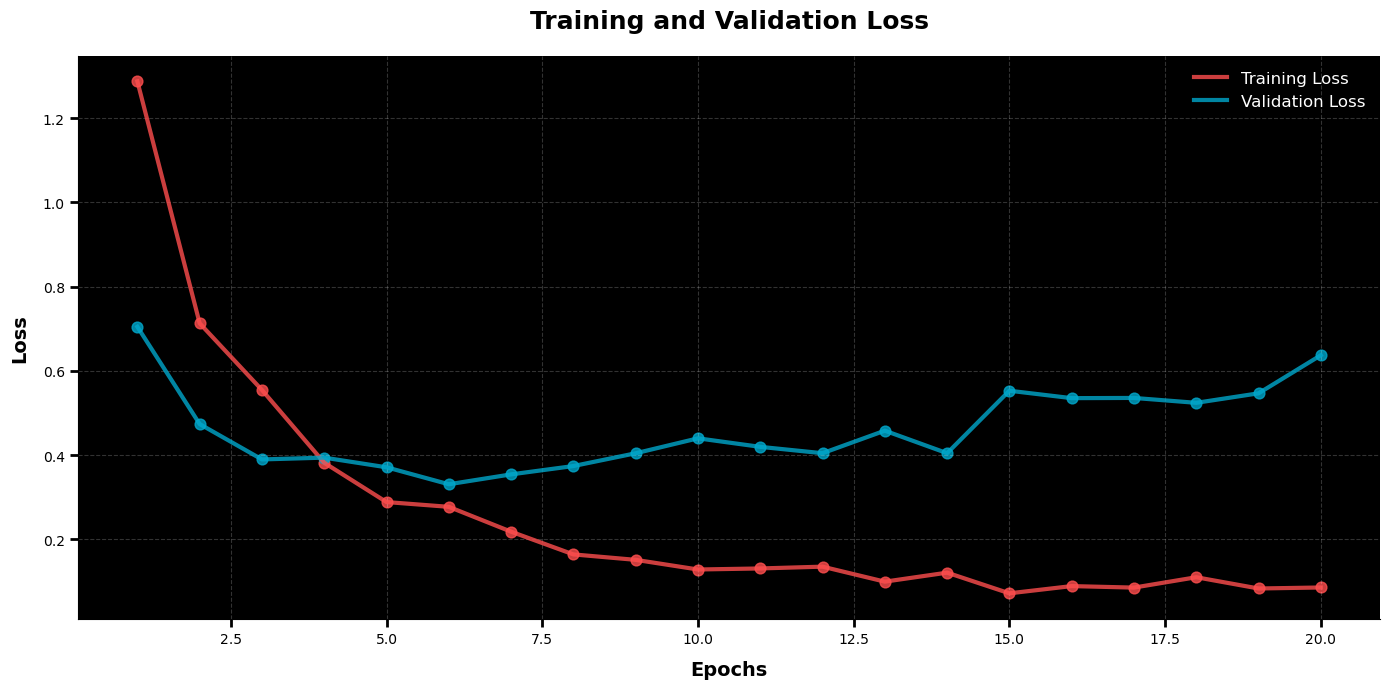

In [375]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='both', length=6, width=2)
ax.set_facecolor('#000000') 

ax.plot(epochs, loss, linewidth=3, label="Training Loss", color='#ff4e4e', alpha=0.8)
ax.scatter(epochs, loss, s=60, color='#ff4e4e', alpha=0.8)

ax.plot(epochs, val_loss, linewidth=3, label="Validation Loss", color='#00a8cc', alpha=0.8)
ax.scatter(epochs, val_loss, s=60, color='#00a8cc', alpha=0.8)

ax.set_xlabel('Epochs', fontsize=14, labelpad=10, color='#000000', fontweight='bold')
ax.set_ylabel('Loss', fontsize=14, labelpad=10, color='#000000', fontweight='bold')
ax.set_title('Training and Validation Loss', fontsize=18, pad=20, color='#000000', fontweight='bold')

legend = ax.legend(loc='upper right', fontsize=12, frameon=False)
legend.set_title(None)
for handle in legend.legendHandles:
    handle.set_markersize(50)
legend.get_frame().set_facecolor('none')
for text in legend.get_texts():
    text.set_color('#ffffff')

ax.grid(color='#ffffff', linestyle='--', alpha=0.2)

plt.tight_layout()

plt.show()

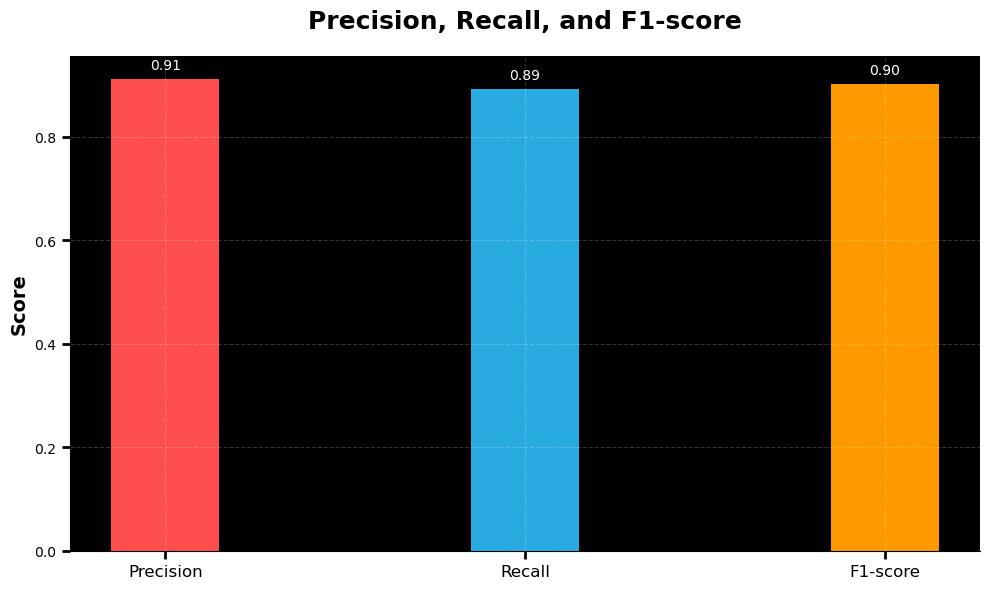

In [376]:
import matplotlib.pyplot as plt
import numpy as np


precision = np.mean(history.history['accuracy'])
recall = np.mean(history.history['val_accuracy'])
f1_score = 2 * ((precision * recall) / (precision + recall))


fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='both', which='both', length=6, width=2)
ax.set_facecolor('#000000')  
x_coordinates = np.array([0, 1, 2])

bar_width = 0.3


ax.bar(x_coordinates, [precision, recall, f1_score], width=bar_width, color=['#ff4e4e', '#29abe2', '#ff9900'])


ax.set_xticks(x_coordinates)
ax.set_xticklabels(['Precision', 'Recall', 'F1-score'], fontsize=12, color='#000000')

ax.set_ylabel('Score', fontsize=14, color='#000000', fontweight='bold')

ax.set_title('Precision, Recall, and F1-score', fontsize=18, pad=20, color='#000000', fontweight='bold')

for i, score in enumerate([precision, recall, f1_score]):
    ax.text(x_coordinates[i], score + 0.02, f'{score:.2f}', ha='center', color='#ffffff')


ax.grid(color='#ffffff', linestyle='--', alpha=0.2)


plt.tight_layout()


plt.show()

**PREDICTION**

In [377]:
link = '/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(20).jpg'
img = cv2.imread(link)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape
#img_array = img_array.reshape(1, 150, 150, 3)

(150, 150, 3)

In [378]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

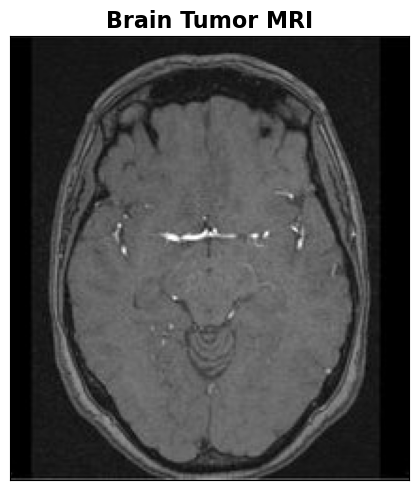

In [379]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = link
img = mpimg.imread(img_path)

# Set the figure size
fig, ax = plt.subplots(figsize=(5, 5))

# Display the image
imgplot = ax.imshow(img, cmap='viridis')

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Add a title
ax.set_title('Brain Tumor MRI', fontsize=16, fontweight='bold')

# Adjust spacing
plt.tight_layout()

# Show the image
plt.show()


1/1 [==============================] - 0s 193ms/step
Predicted Tumor: No Tumor
Adjusted Probabilities:
Glioma Tumor: 0.08178076148033142
Meningioma Tumor: 0.12267114222049713
No Tumor: 0.6037261486053467
Pituitary Tumor: 0.09813691675662994


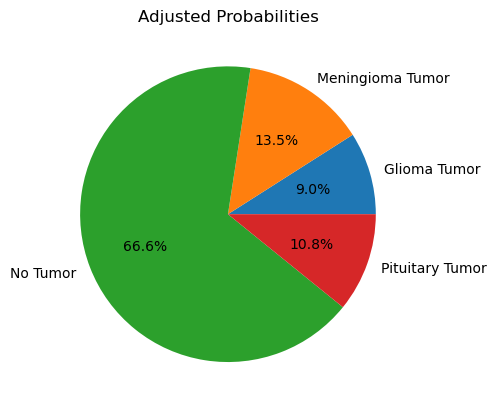

In [380]:
import numpy as np
import matplotlib.pyplot as plt

# Define the temperature value (higher temperature -> more uniform probabilities)
temperature = 0.45

# Define scaling factors for each class (based on the class frequencies in the dataset)
scaling_factors = [1.0, 1.5, 0.8, 1.2]

logits = model.predict(img_array)
logits /= temperature  

probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Apply scaling factors to the probabilities
probabilities *= scaling_factors

indices = np.argmax(probabilities)
if indices == 0:
    predicted_tumor = 'Glioma Tumor'
elif indices == 1:
    predicted_tumor = 'Meningioma Tumor'
elif indices == 2:
    predicted_tumor = 'No Tumor'
elif indices == 3:
    predicted_tumor = 'Pituitary Tumor'
else:
    predicted_tumor = 'Unknown'

print('Predicted Tumor:', predicted_tumor)
print('Adjusted Probabilities:')
for tumor, prob in zip(['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor'], probabilities[0]):
    print(f'{tumor}: {prob}')

# Plotting the pie chart
labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']
plt.pie(probabilities[0], labels=labels, autopct='%1.1f%%')
plt.title('Adjusted Probabilities')
plt.show()

